In [1]:
import random as rnd
import matplotlib.pyplot as plt
import math as m
import numpy as np

In [2]:
repetition_amount = 100000

In [3]:
# comparing sqrt(random) to max(random)
randsqrt = []
randmax = []
for i in range(repetition_amount):
    i += 1
    randsqrt.append(m.sqrt(rnd.random()))
    randmax.append(max(rnd.random(), rnd.random()))

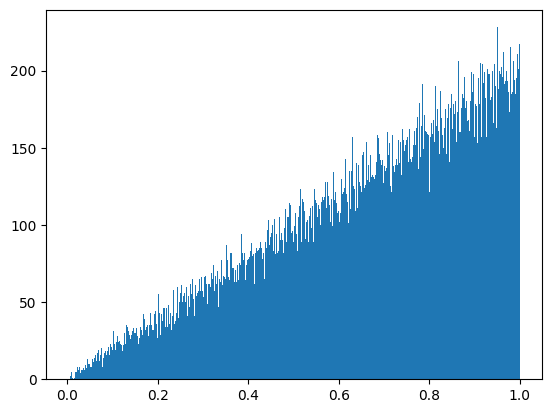

In [4]:
plt.hist(randsqrt, bins=1000)
plt.show()


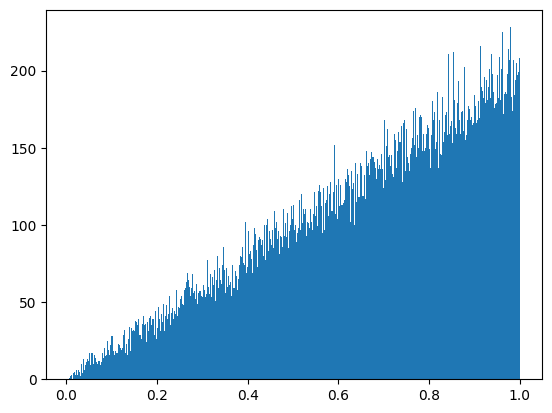

In [5]:
plt.hist(randmax, bins=1000)
plt.show()

Correlation Coefficient: 1.0
Chi-Squared Distance: 0.0
Histogram Intersection: 1.0
Bhattacharyya Distance: -1.000000082690371e-10


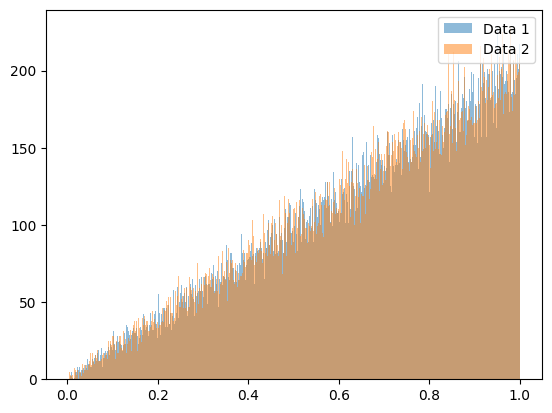

In [6]:
def calculate_histogram(data, bins=10, range=(0, 256)):
    """Calculate a normalized histogram for the given data."""
    hist, bin_edges = np.histogram(data, bins=bins, range=range)
    hist = hist.astype('float32') / (hist.sum() + 1e-10)  # Normalize the histogram
    return hist

def correlation_coefficient(hist1, hist2):
    """Calculate the correlation coefficient between two histograms."""
    return np.corrcoef(hist1, hist2)[0, 1]

def chi_squared_distance(hist1, hist2):
    """Calculate the Chi-squared distance between two histograms."""
    return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))

def histogram_intersection(hist1, hist2):
    """Calculate the intersection between two histograms."""
    return np.sum(np.minimum(hist1, hist2))

def bhattacharyya_distance(hist1, hist2):
    """Calculate the Bhattacharyya distance between two histograms."""
    return -np.log(np.sum(np.sqrt(hist1 * hist2)) + 1e-10)

# Example data
#data1 = [1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9, 10]
#data2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12]
data1 = randsqrt
data2 = randmax

# Calculate histograms
hist1 = calculate_histogram(data1)
hist2 = calculate_histogram(data2)

# Calculate similarity measures
corr_coeff = correlation_coefficient(hist1, hist2)
chi_squared = chi_squared_distance(hist1, hist2)
intersection = histogram_intersection(hist1, hist2)
bhattacharyya = bhattacharyya_distance(hist1, hist2)

# Print results
print(f"Correlation Coefficient: {corr_coeff}")
print(f"Chi-Squared Distance: {chi_squared}")
print(f"Histogram Intersection: {intersection}")
print(f"Bhattacharyya Distance: {bhattacharyya}")

# Optional: Plot histograms for visualization
plt.hist(data1, bins=1000, alpha=0.5, label='Data 1')
plt.hist(data2, bins=1000, alpha=0.5, label='Data 2')
plt.legend(loc='upper right')
plt.show()
